In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 20 columns of a dataframe
pd.set_option('display.max_columns', 20)

# Matplotlib visualization
import matplotlib.pyplot as plt

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

In [2]:
# Read in data into a dataframe 
matches = pd.read_csv('data/matches.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Get the Team Names
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [5]:
#Get the Cities
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [6]:
#Make 'Delhi Daredevils' as 'Delhi Capitals'
matches['team1'] = matches['team1'].replace('Delhi Daredevils', 'Delhi Capitals')
matches['team2'] = matches['team2'].replace('Delhi Daredevils', 'Delhi Capitals')
matches['winner'] = matches['winner'].replace('Delhi Daredevils', 'Delhi Capitals')
matches['toss_winner'] = matches['toss_winner'].replace('Delhi Daredevils', 'Delhi Capitals')

#Make 'Rising Pune Supergiant' as 'Rising Pune Supergiants'
matches['team1'] = matches['team1'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['team2'] = matches['team2'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['winner'] = matches['winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
matches['toss_winner'] = matches['toss_winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

#Replace "Bengaluru" with "Bengalore"
matches['city'] = matches['city'].replace('Bengaluru', 'Bangalore')

<b>1.	How many matches we have got in the dataset?</b>

In [7]:
print(f"We have record of {matches.shape[0]} matches.")

We have record of 756 matches.


<b>2.	Which Team had won by maximum runs?</b>

In [8]:
max_runs = matches[['team1','team2','season', 'win_by_runs']].sort_values(by = 'win_by_runs', ascending = False).head()
max_runs

,team1,team2,season,win_by_runs
43,Mumbai Indians,Delhi Capitals,2017,146
619,Royal Challengers Bangalore,Gujarat Lions,2016,144
59,Kolkata Knight Riders,Royal Challengers Bangalore,2008,140
556,Royal Challengers Bangalore,Kings XI Punjab,2015,138
410,Royal Challengers Bangalore,Pune Warriors,2013,130


<b>3.	How many seasons we've got in the dataset?</b>

In [9]:
print(f"We have matches of {matches['season'].nunique()} seasons. \nSeasosn are {np.sort(matches['season'].unique())}.")

We have matches of 12 seasons. 
Seasosn are [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019].


<b>4.	Which Team had won by maximum wicket?</b>

In [10]:
max_wickets = matches[['team1','team2','season', 'win_by_wickets']].sort_values('win_by_wickets', ascending = False).head()
max_wickets

,team1,team2,season,win_by_wickets
119,Kings XI Punjab,Delhi Capitals,2009,10
390,Kings XI Punjab,Chennai Super Kings,2013,10
34,Delhi Capitals,Kings XI Punjab,2017,10
590,Gujarat Lions,Sunrisers Hyderabad,2016,10
71,Mumbai Indians,Deccan Chargers,2008,10


<b>5.	Which Season had most number of matches?</b>

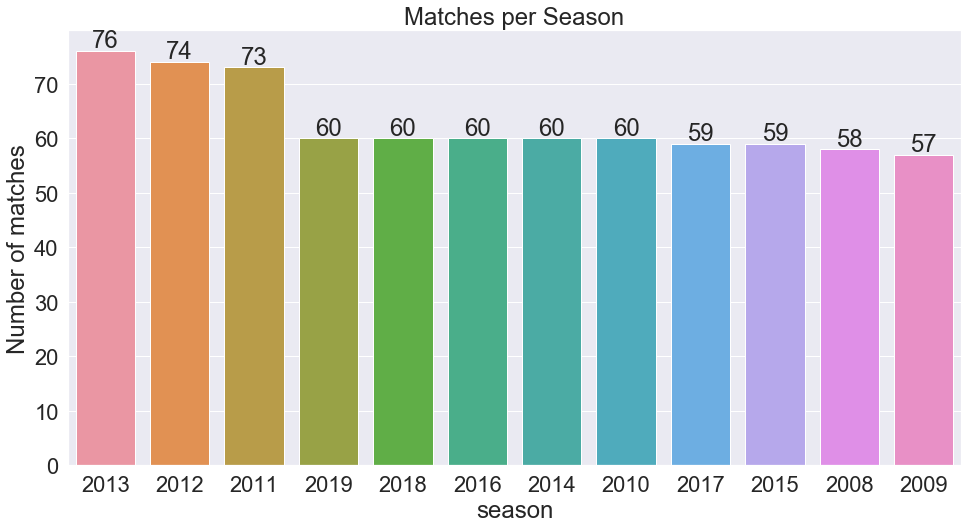

In [11]:
figsize(16, 8)

matches_per_season = sns.countplot(x='season',data = matches, order = matches['season'].value_counts().index)
plt.title("Matches per Season")
plt.ylabel('Number of matches')
for p in matches_per_season.patches:
    matches_per_season.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<b>6.	The most successful IPL team by number of Win?</b>

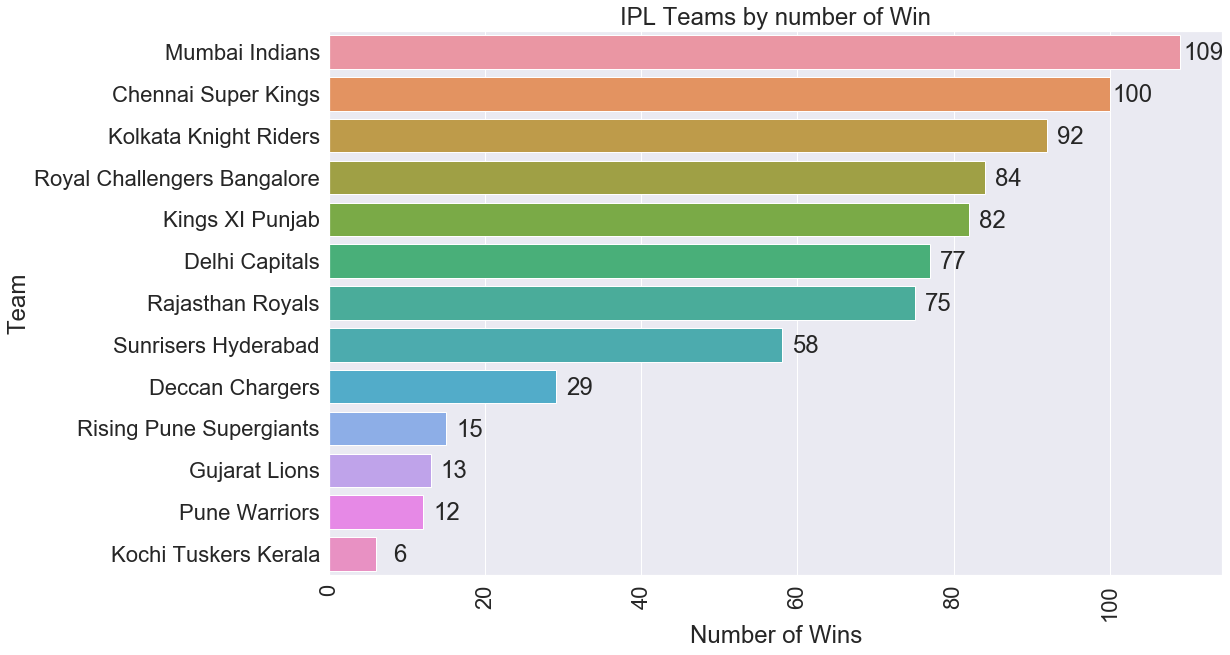

In [12]:
figsize(16, 10)

ax = sns.countplot(y='winner',data = matches, order = matches['winner'].value_counts().index)
plt.xticks(rotation = 90)
plt.ylabel('Team')
plt.xlabel('Number of Wins')
plt.title("IPL Teams by number of Win")
for p in ax.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

<b>7.	Which Team has played most number of matches?</b>

In [13]:
teams = matches.team1.unique()
played_matches = []
for each_team in teams:
    match_team = np.count_nonzero(matches['team1'] == each_team) + np.count_nonzero(matches['team2'] == each_team)
    played_matches.append(match_team)

played_matches

[108, 187, 30, 30, 180, 178, 177, 176, 164, 147, 75, 14, 46]

In [14]:
matches_played = pd.DataFrame({'team': teams, 'matches_played': played_matches}).sort_values('matches_played', ascending = False)
matches_played.head()

,team,matches_played
1,Mumbai Indians,187
4,Royal Challengers Bangalore,180
5,Kolkata Knight Riders,178
6,Delhi Capitals,177
7,Kings XI Punjab,176


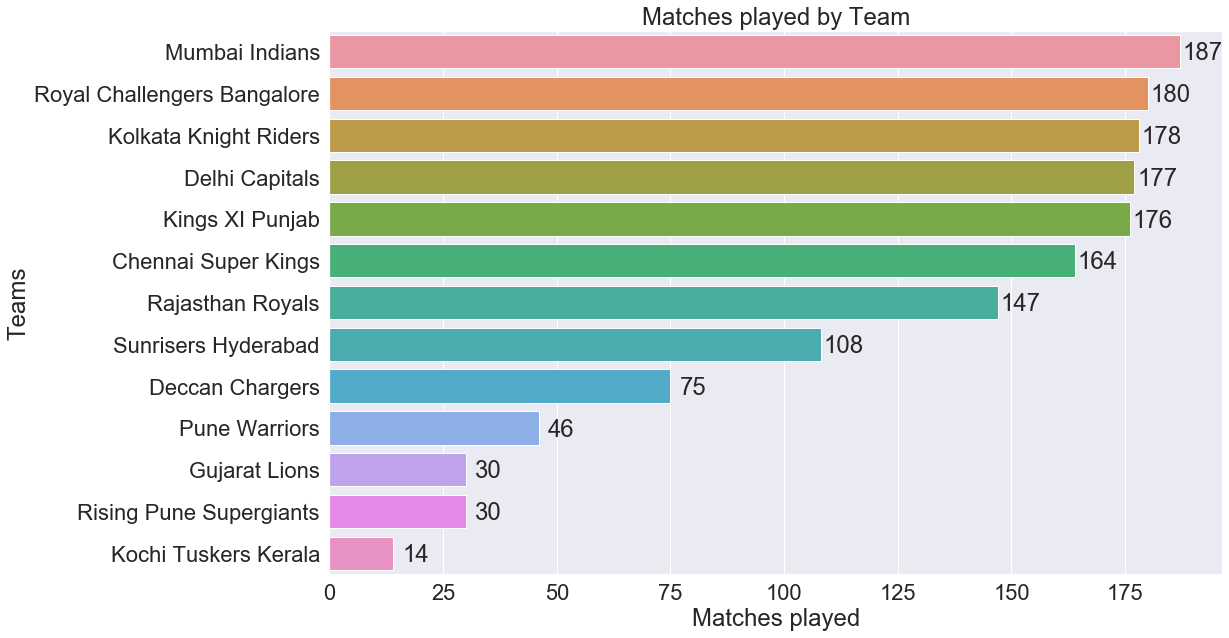

In [15]:
figsize(16, 10)

ax = sns.barplot(x='matches_played', y='team', data=matches_played)
plt.xlabel('Matches played')
plt.ylabel('Teams')
plt.title("Matches played by Team")

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

<b>8.	The most successful IPL team by Win%?</b>

In [16]:
winPercent = []

for each_team in teams:
    played_matches  = np.count_nonzero(matches['team1'] == each_team) + np.count_nonzero(matches['team2'] == each_team)
    matches_won = np.count_nonzero(matches['winner']== each_team)   
    winPercent.append(100 * (matches_won / played_matches))
    
win_percent = pd.DataFrame({'team': teams, 'win_percent': winPercent}).sort_values('win_percent', ascending = False)
win_percent.head()

,team,win_percent
8,Chennai Super Kings,60.975610
1,Mumbai Indians,58.288770
0,Sunrisers Hyderabad,53.703704
5,Kolkata Knight Riders,51.685393
9,Rajasthan Royals,51.020408


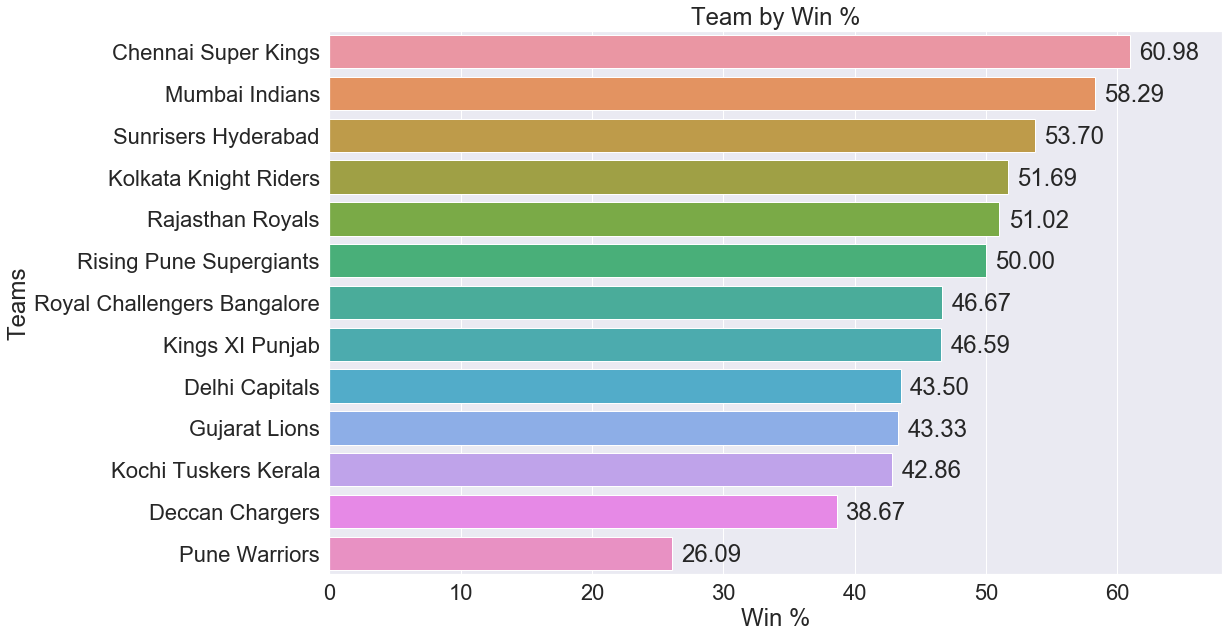

In [17]:
figsize(16, 10)

ax = sns.barplot(x='win_percent', y='team', data=win_percent)
plt.xlabel('Win %')
plt.ylabel('Teams')
plt.title("Team by Win %")
plt.xlim(right = 68)

for p in ax.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

<b>9.	Top player of the match winners?</b>

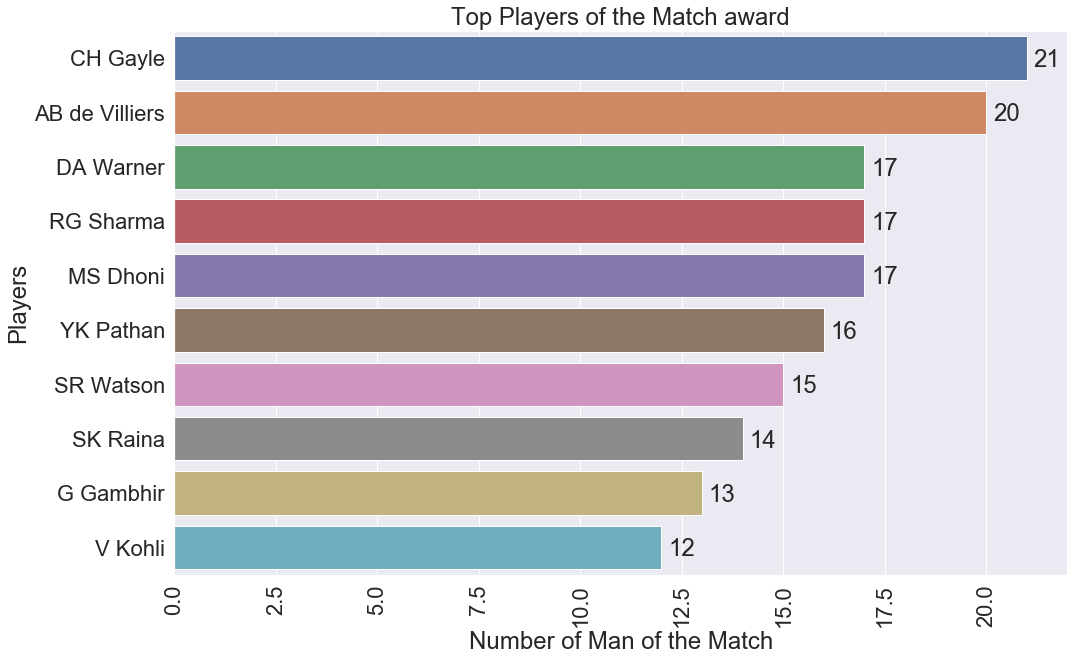

In [18]:
figsize(16, 10)

ax = sns.countplot(y='player_of_match',data = matches, order = matches['player_of_match'].value_counts().nlargest(10).index)
plt.xticks(rotation = 90)
plt.ylabel('Players')
plt.xlabel('Number of Man of the Match')
plt.title("Top Players of the Match award")
plt.xlim(right=22)
for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

<b>10.	Has Toss-winning helped in Match-winning?</b>

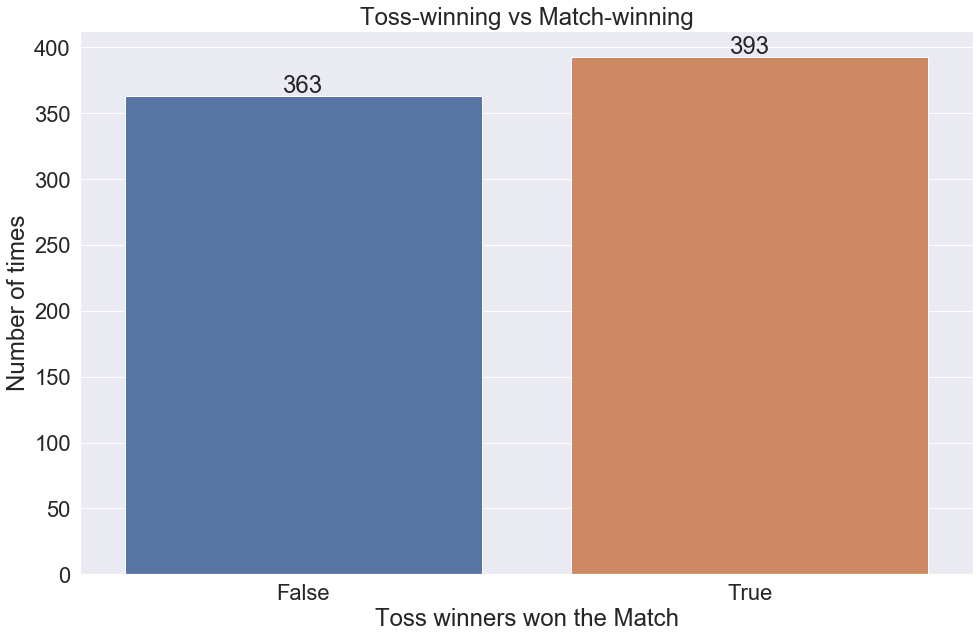

In [20]:
ax = sns.countplot((matches['winner'] == matches['toss_winner']))
plt.xlabel('Toss winners won the Match')
plt.ylabel('Number of times')
plt.title("Toss-winning vs Match-winning")

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<b>11.	Which Team had won by (closest margin) minimum runs?</b>

In [21]:
min_runs = matches[matches['win_by_runs'] >= 1][['team1','team2','season', 'win_by_runs']].sort_values(by = 'win_by_runs').head()
min_runs

,team1,team2,season,win_by_runs
755,Mumbai Indians,Chennai Super Kings,2019,1
163,Kings XI Punjab,Deccan Chargers,2009,1
598,Gujarat Lions,Delhi Capitals,2016,1
344,Delhi Capitals,Rajasthan Royals,2012,1
105,Kings XI Punjab,Mumbai Indians,2008,1


<b>12.	How many matches are played in each city?</b>

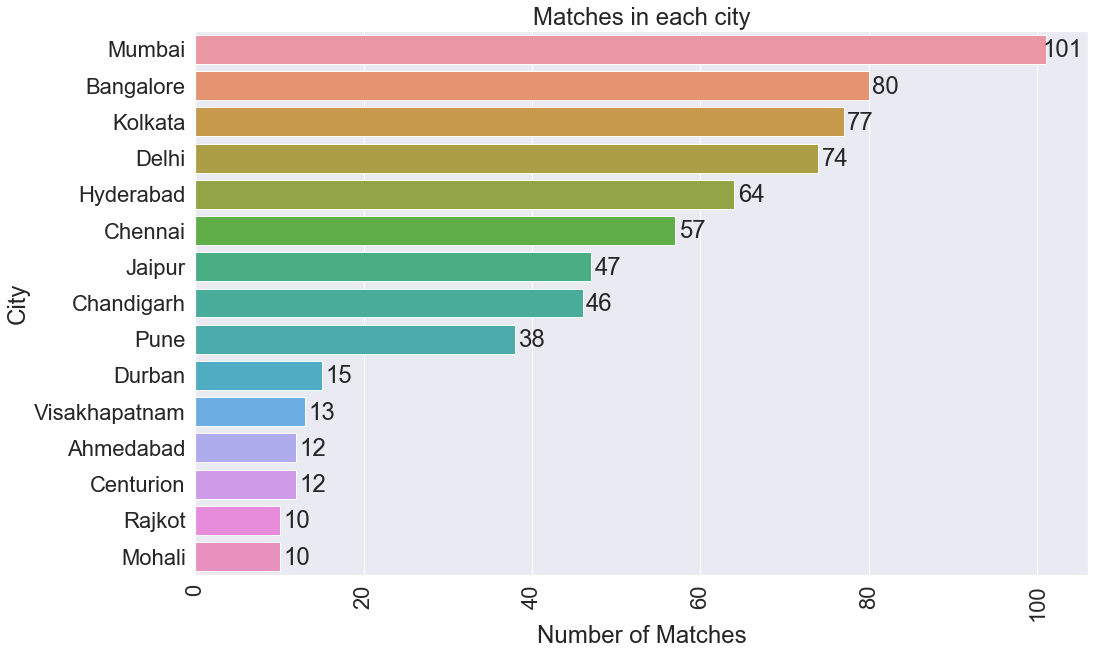

In [22]:
figsize(16, 10)

ax = sns.countplot(y='city',data = matches, order = matches['city'].value_counts().nlargest(15).index)
plt.xticks(rotation = 90)
plt.ylabel('City')
plt.xlabel('Number of Matches')
plt.title("Matches in each city")
for p in ax.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

<b>13.	Matches played in each stadium?</b>

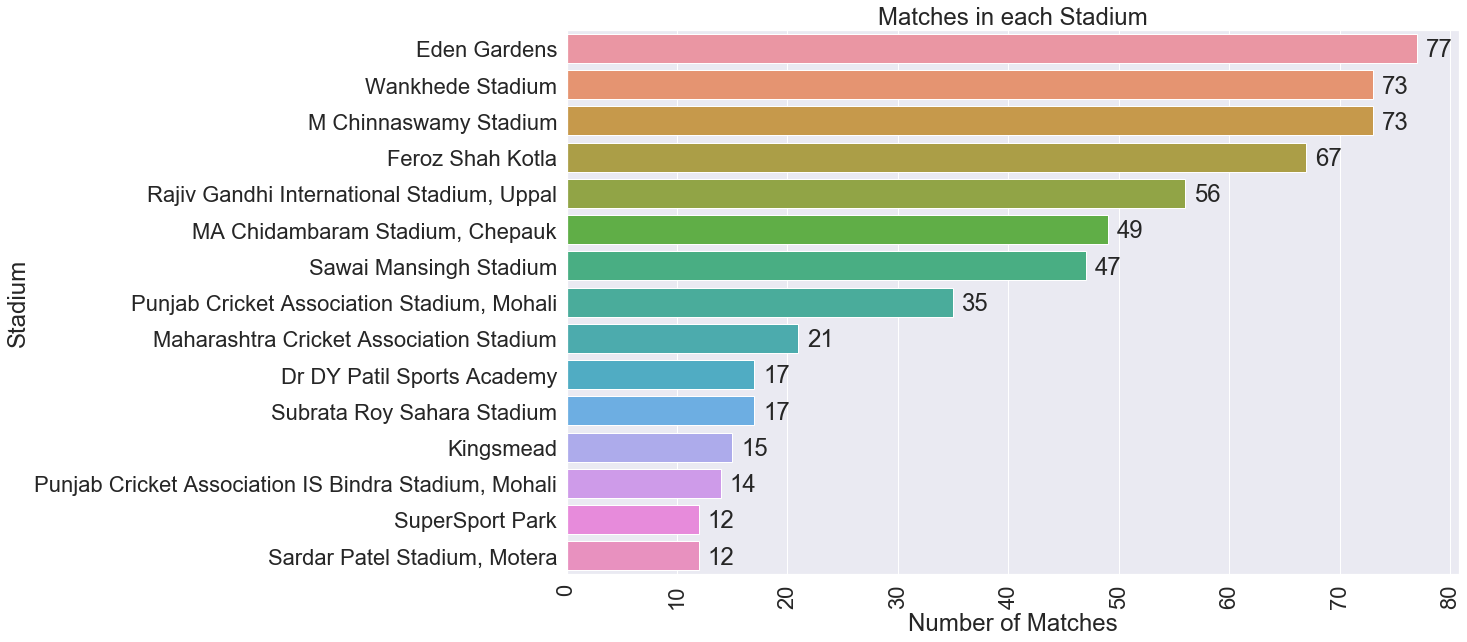

In [23]:
figsize(16, 10)

ax = sns.countplot(y='venue',data = matches, order = matches['venue'].value_counts().nlargest(15).index)
plt.xticks(rotation = 90)
plt.ylabel('Stadium')
plt.xlabel('Number of Matches')
plt.title("Matches in each Stadium")
for p in ax.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')